In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# Задание №1

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

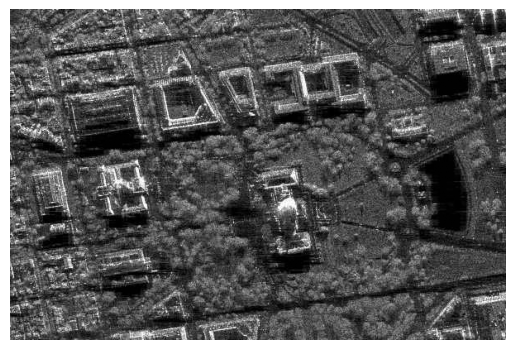

In [7]:
image = cv2.imread('sar_1_gray.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")
plt.axis("off")

# Задание №2


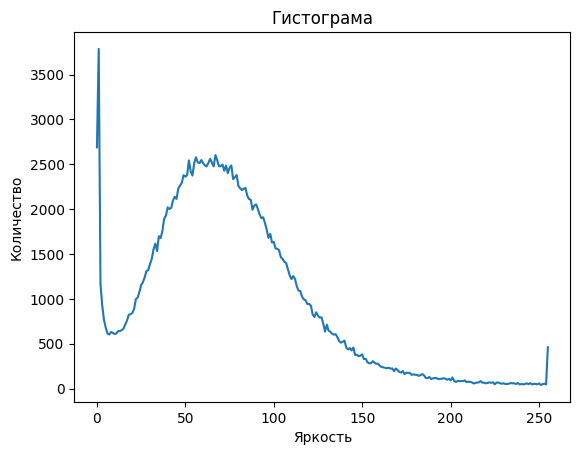

In [ ]:
histSize = 256
histRange = (0, 256)
accumulate = False

hist = cv2.calcHist([image_gray], [0], None, [histSize], histRange, accumulate=accumulate)

plt.title('Гистограма')
plt.xlabel('Значение яркости')
plt.ylabel('Количество пикселей')

plt.plot(hist)

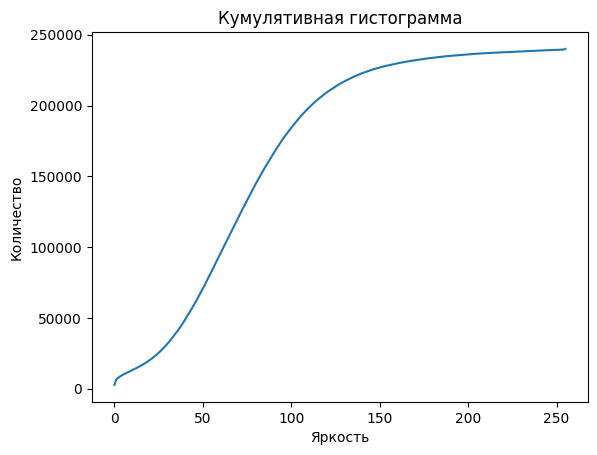

In [ ]:
hist_cum = hist.cumsum()

plt.title('Кумулятивная гистограмма')
plt.xlabel('Значение яркости')
plt.ylabel('Количество пикселей')

plt.plot(hist_cum)

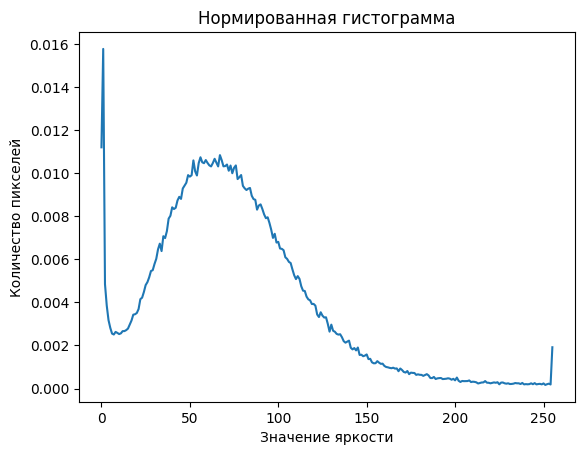

In [16]:
hist_norm = hist / (image.shape[0] * image.shape[1])

plt.title("Нормированная гистограмма")
plt.xlabel('Значение яркости')
plt.ylabel('Количество пикселей')

plt.plot(hist_norm)

# Задание №3

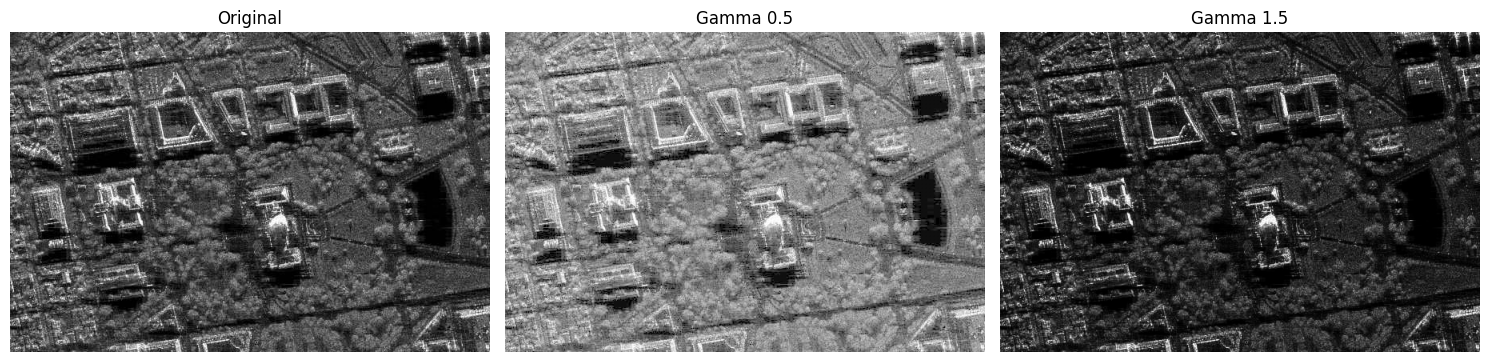

In [ ]:
def gamma_correction(image, gamma):
    normalized = image / 255.0
    corrected = np.power(normalized, gamma) * 255
    return corrected.astype(np.uint8)

gamma_05 = gamma_correction(image_gray, 0.5)
gamma_15 = gamma_correction(image_gray, 1.5)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Источник')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gamma_05, cmap='gray')
plt.title('Гамма 0.5')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gamma_15, cmap='gray')
plt.title('Гамма 1.5')
plt.axis('off')

plt.tight_layout()
plt.show()

# Задание №4

In [ ]:
mse_gamma_05 = mean_squared_error(image_gray, gamma_05)
ssim_gamma_05 = structural_similarity(image_gray, gamma_05)

mse_gamma_15 = mean_squared_error(image_gray, gamma_15)
ssim_gamma_15 = structural_similarity(image_gray, gamma_15)

print(f'Гамма 0.5:\nMSE:{mse_gamma_05:.2f}  SSIM:{ssim_gamma_05:.4f}')
print()
print(f'Гамма 1.5:\nMSE:{mse_gamma_15:.2f}  SSIM:{ssim_gamma_15:.4f}')

Gamma 0.5:
MSE:3250.43  SSIM:0.7875

Gamma 1.5:
MSE:971.82  SSIM:0.8066


# Задание №5

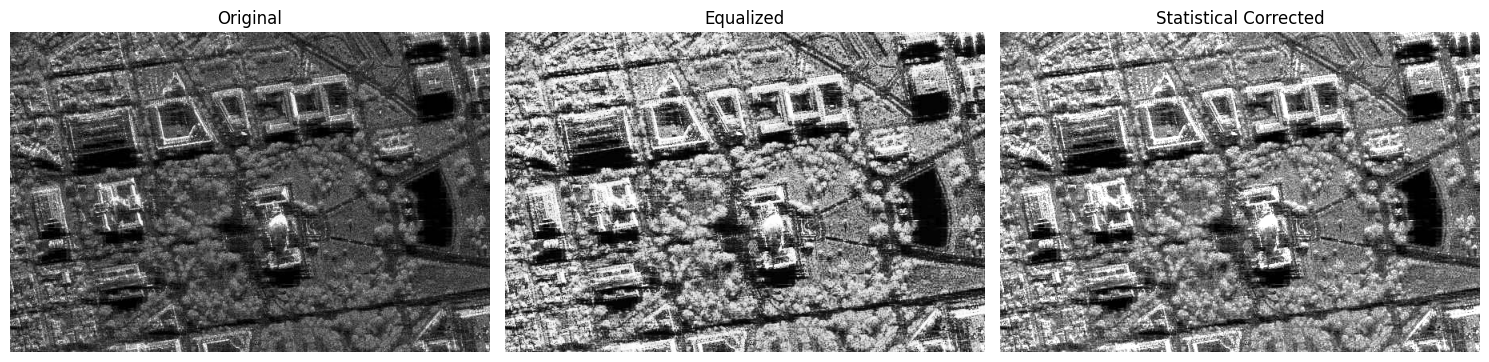

In [ ]:
mean = image_gray.mean()
std = image_gray.std()

eq_gray = cv2.equalizeHist(image_gray)

eq_mean = eq_gray.mean()
eq_std = eq_gray.std()

stat_corrected = (image_gray.astype(float) - mean) * (eq_std / std) + eq_mean
stat_corrected = np.clip(stat_corrected, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Источник')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title('Выровненное изображение')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(stat_corrected, cmap='gray')
plt.title('Скорректированное изображение')
plt.axis('off')

plt.tight_layout()
plt.show()

# Задание №6

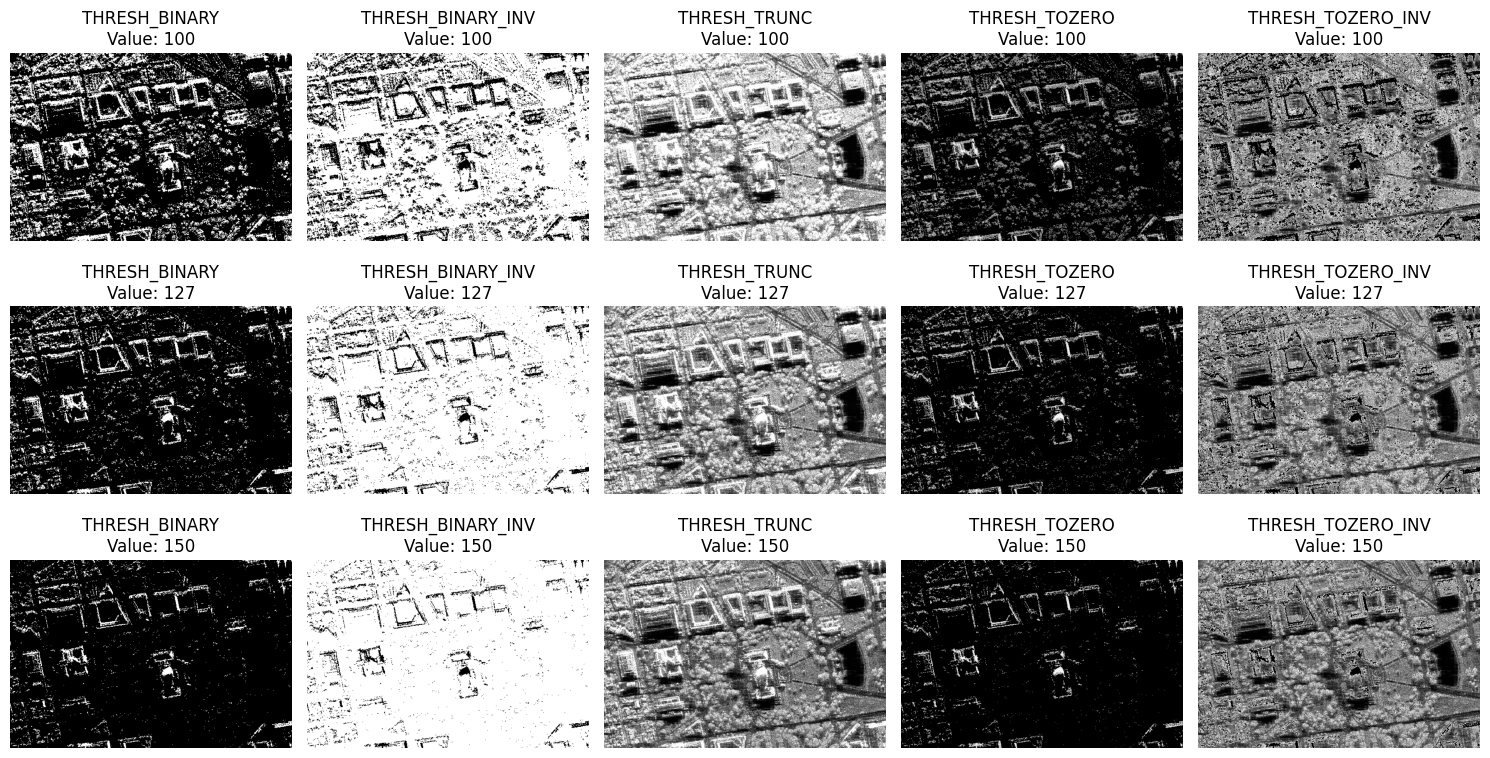

In [18]:
thresh_methods = [
    ('THRESH_BINARY', cv2.THRESH_BINARY),
    ('THRESH_BINARY_INV', cv2.THRESH_BINARY_INV),
    ('THRESH_TRUNC', cv2.THRESH_TRUNC),
    ('THRESH_TOZERO', cv2.THRESH_TOZERO),
    ('THRESH_TOZERO_INV', cv2.THRESH_TOZERO_INV)
]

thresh_values = [100, 127, 150]

plt.figure(figsize=(15, 8))

for row, thresh_val in enumerate(thresh_values):
    for col, (method_name, method) in enumerate(thresh_methods):
        ret, thresh = cv2.threshold(image_gray, thresh_val, 255, method)    
        plt.subplot(len(thresh_values), len(thresh_methods), row * len(thresh_methods) + col + 1)
        plt.imshow(thresh, cmap='gray')
        plt.title(f'{method_name}\nValue: {thresh_val}')
        plt.axis('off')

plt.tight_layout()
plt.show()